In [24]:
% matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris

iris = load_iris()
iris_x = iris.data
iris_y = iris.target


In [3]:
# Train model
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=15).fit(
    iris_x, iris_y,
)
knn


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=15, p=2,
           weights='uniform')

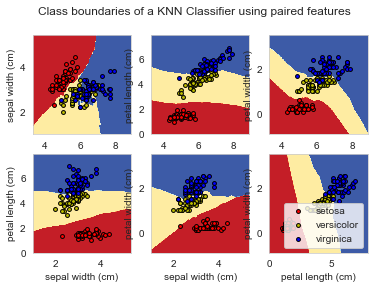

In [25]:
import seaborn as sns
sns.set_style('whitegrid')

FEATURES_PAIRS = [
    [0, 1], [0, 2], [0, 3],
    [1, 2], [1, 3], [2, 3],
]

for idx, pair in enumerate(FEATURES_PAIRS):
    # Create subplot for selected pair of features
    plt.subplot(2, 3, idx + 1)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    # Filter data by chosen features and train model on them
    iris_x, iris_y = iris.data[:, pair], iris.target
    clf = KNeighborsClassifier().fit(iris_x, iris_y)

    # Generate data to visualize boundaries
    x, y = iris_x[:, 0], iris_x[:, 1]
    xx, yy = np.meshgrid(
        np.arange(x.min() - 1, x.max() + 1, 0.02),
        np.arange(y.min() - 1, y.max() + 1, 0.02),
    )
    z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    z = z.reshape(xx.shape)

    # Plot boundaries
    plt.contourf(xx, yy, z, cmap=plt.cm.RdYlBu)

    # Plot training points
    for i, color in enumerate(['r', 'y', 'b']):
        indices = iris_y == i
        plt.scatter(
            x=iris_x[indices, 0], y=iris_x[indices, 1],
            c=color, edgecolors='k', s=15,
            label=iris.target_names[i],
        )

plt.suptitle('Class boundaries of a KNN Classifier using paired features')
plt.legend(loc='lower right')

plt.show()
